In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.metrics import average_precision_score

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
torch.manual_seed(1);

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
torch.cuda.is_available()

True

## Read data

In [5]:
import os
SEQ_LEN = 64
IM_SIZE = 28

seq_name = "4in7"
seq_classes = ["different", "observable", "similar"]
seq_class = "observable"

In [6]:
# def read_img_sequences(path_to_folder, size=500):
#     curr_size = 0
#     data = []
#     labels = []
    
#     for sequence_folder in os.listdir(path_to_folder):
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN
        
#         for img_path in os.listdir(full_sequence_folder):
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)

#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector
#             img = torch.load(full_path_to_img).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             sequence_img[im_index] = img
#             sequence_labels[im_index] = label
#         data.append(sequence_img)
#         labels.append(sequence_labels)
#         if curr_size ==  size:
#             break
#     return data, labels

In [7]:
import time
# if torch.cuda.is_available():
#     map_location=lambda storage, loc: storage.cuda()
# else:
#     map_location='cpu'

**старая версия считывания**


In [8]:
# anomaly_data = []
# anomaly_labels = []

# def read_img_sequences_anomaly(path_to_folder, size=3):
#     curr_size = 0
    
#     folder_path = os.listdir(path_to_folder)

#     for sequence_folder in folder_path:
#         start_time = time.clock()
        
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN


#         print(curr_size)
        
#         full_path = os.listdir(full_sequence_folder)
        
        
        
#         for img_path in full_path:
#               #time.sleep(0.02)
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)


#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector

#             #img = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()

#             start_time_real = time.time()
#             sequence_img[im_index] = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             print (time.time() - start_time_real, "Real seconds")

#             sequence_labels[im_index] = label

#         anomaly_data.append(sequence_img)
#         anomaly_labels.append(sequence_labels)

#         print (time.clock() - start_time, "Compute seconds")
        
#         if curr_size ==  size:
#             break

#         del sequence_img, sequence_labels

#     return 0

# read_img_sequences_anomaly('/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_anomaly/')

In [9]:
# normal_data = []
# normal_labels = []

# def read_img_sequences_normal(path_to_folder, size=200):
#     curr_size = 0
    
#     folder_path = os.listdir(path_to_folder)

#     for sequence_folder in folder_path:
#         start_time = time.clock()
#         start_time_real = time.time()
#         curr_size += 1
#         full_sequence_folder = os.path.join(path_to_folder, sequence_folder)
#         sequence_img = [None] * SEQ_LEN
#         sequence_labels = [None] * SEQ_LEN


#         print(curr_size)
        
#         full_path = os.listdir(full_sequence_folder)
        
        
        
#         for img_path in full_path:
#               #time.sleep(0.02)
#             # -3: drop .pt
#             im_index, label = img_path[:-3].split('_')
#             im_index = int(im_index)
#             label = int(label)


#             full_path_to_img = os.path.join(full_sequence_folder, img_path)
#             # load image and reshape to vector

#             #img = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
            
#             sequence_img[im_index] = torch.load(full_path_to_img, map_location=map_location).view(IM_SIZE * IM_SIZE).detach().cpu().numpy()
#             sequence_labels[im_index] = label

#         normal_data.append(sequence_img)
#         normal_labels.append(sequence_labels)

#         print (time.clock() - start_time, "Compute seconds")
#         print (time.time() - start_time_real, "Real seconds")
#         if curr_size ==  size:
#             break

#         del sequence_img, sequence_labels

#     return 0

# read_img_sequences_normal('/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_normal/')

In [10]:
# cd "/content/drive/My Drive/CPDnumbers/different/num0in8/img_ts_anomaly/"

In [11]:
# pwd

In [12]:
#anomaly_data, anomaly_labels = read_img_sequences('/content/drive/My Drive/CPDnumbers/similar/num3in5/img_ts_anomaly/')


In [13]:
#normal_data, normal_labels = read_img_sequences('/content/drive/My Drive/CPDnumbers/similar/num3in5/img_ts_normal/')

**New csv method for download**

In [14]:
import csv
from numpy import genfromtxt

In [15]:
anomaly_data_csv = []
anomaly_labels_csv = []

def read_img_sequences_anomaly_csv(path_to_folder, size=500):
    curr_size = 0
    
    csv_img_file_path = os.listdir(path_to_folder + "images")
    csv_img_file_path.sort()
    csv_lables_file_path = os.listdir(path_to_folder + "labels")
    csv_lables_file_path.sort()

    print(csv_img_file_path)
    print(csv_lables_file_path)


    for sequence_csv, lables_csv in zip(csv_img_file_path, csv_lables_file_path) :
        start_time = time.clock()      
        curr_size += 1
        print(curr_size)

        sequence_img = [None] * SEQ_LEN
        sequence_labels = [None] * SEQ_LEN

        with open(path_to_folder + "images/" + sequence_csv) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          
          row_number = 0;
          for row in csv_reader:
            start_time_real = time.time()

            sequence_img[row_number] = genfromtxt(row, dtype=np.float32)

            row_number += 1

            #print (time.time() - start_time_real, "Real seconds")

        with open(path_to_folder + "labels/" + lables_csv) as csv_file_lables:
          csv_reader_l = csv.reader(csv_file_lables, delimiter=',')

          row_number_l = 0
          for row_l in csv_reader_l:

            sequence_labels[row_number_l] = np.int(genfromtxt(row_l))

            row_number_l += 1


        anomaly_data_csv.append(sequence_img)
        anomaly_labels_csv.append(sequence_labels)

        #print (time.clock() - start_time, "Compute seconds")
        
        if curr_size ==  size:
            break

        del sequence_img, sequence_labels

    return 0

read_img_sequences_anomaly_csv("num"+ seq_name + "/img_ts_anomaly/")

['img_series_0.csv', 'img_series_1.csv', 'img_series_10.csv', 'img_series_100.csv', 'img_series_101.csv', 'img_series_102.csv', 'img_series_103.csv', 'img_series_104.csv', 'img_series_105.csv', 'img_series_106.csv', 'img_series_107.csv', 'img_series_108.csv', 'img_series_109.csv', 'img_series_11.csv', 'img_series_110.csv', 'img_series_111.csv', 'img_series_112.csv', 'img_series_113.csv', 'img_series_114.csv', 'img_series_115.csv', 'img_series_116.csv', 'img_series_117.csv', 'img_series_118.csv', 'img_series_119.csv', 'img_series_12.csv', 'img_series_120.csv', 'img_series_121.csv', 'img_series_122.csv', 'img_series_123.csv', 'img_series_124.csv', 'img_series_125.csv', 'img_series_126.csv', 'img_series_127.csv', 'img_series_128.csv', 'img_series_129.csv', 'img_series_13.csv', 'img_series_130.csv', 'img_series_131.csv', 'img_series_132.csv', 'img_series_133.csv', 'img_series_134.csv', 'img_series_135.csv', 'img_series_136.csv', 'img_series_137.csv', 'img_series_138.csv', 'img_series_139.c

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278


0

In [16]:
normal_data_csv = []
normal_labels_csv = []

def read_img_sequences_normal_csv(path_to_folder, size=500):
    curr_size = 0
    
    csv_img_file_path = os.listdir(path_to_folder + "images")
    csv_img_file_path.sort()
    csv_lables_file_path = os.listdir(path_to_folder + "labels")
    csv_lables_file_path.sort()

    print(csv_img_file_path)
    print(csv_lables_file_path)


    for sequence_csv, lables_csv in zip(csv_img_file_path, csv_lables_file_path) :
        start_time = time.clock()      
        curr_size += 1
        print(curr_size)

        sequence_img = [None] * SEQ_LEN
        sequence_labels = [None] * SEQ_LEN

        with open(path_to_folder + "images/" + sequence_csv) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          
          row_number = 0;
          for row in csv_reader:
            start_time_real = time.time()


            sequence_img[row_number] = genfromtxt(row, dtype=np.float32)

            row_number += 1

            #print (time.time() - start_time_real, "Real seconds")

        with open(path_to_folder + "labels/" + lables_csv) as csv_file_lables:
          csv_reader_l = csv.reader(csv_file_lables, delimiter=',')

          row_number_l = 0
          for row_l in csv_reader_l:

            sequence_labels[row_number_l] = np.int(genfromtxt(row_l))

            row_number_l += 1


        normal_data_csv.append(sequence_img)
        normal_labels_csv.append(sequence_labels)

        #print (time.clock() - start_time, "Compute seconds")
        
        if curr_size ==  size:
            break

        del sequence_img, sequence_labels

    return 0

read_img_sequences_normal_csv("num" + seq_name + "/img_ts_normal/")

['img_series_0.csv', 'img_series_1.csv', 'img_series_10.csv', 'img_series_100.csv', 'img_series_101.csv', 'img_series_102.csv', 'img_series_103.csv', 'img_series_104.csv', 'img_series_105.csv', 'img_series_106.csv', 'img_series_107.csv', 'img_series_108.csv', 'img_series_109.csv', 'img_series_11.csv', 'img_series_110.csv', 'img_series_111.csv', 'img_series_112.csv', 'img_series_113.csv', 'img_series_114.csv', 'img_series_115.csv', 'img_series_116.csv', 'img_series_117.csv', 'img_series_118.csv', 'img_series_119.csv', 'img_series_12.csv', 'img_series_120.csv', 'img_series_121.csv', 'img_series_122.csv', 'img_series_123.csv', 'img_series_124.csv', 'img_series_125.csv', 'img_series_126.csv', 'img_series_127.csv', 'img_series_128.csv', 'img_series_129.csv', 'img_series_13.csv', 'img_series_130.csv', 'img_series_131.csv', 'img_series_132.csv', 'img_series_133.csv', 'img_series_134.csv', 'img_series_135.csv', 'img_series_136.csv', 'img_series_137.csv', 'img_series_138.csv', 'img_series_139.c

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279


0

In [17]:
all_data = np.vstack((anomaly_data_csv, normal_data_csv))
all_labels = np.vstack((anomaly_labels_csv, normal_labels_csv))
#all_labels = (all_labels == 1).astype(int) # old_version
all_labels = (all_labels == int(seq_name[3])).astype(int)


In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, 
                                                                    test_size=0.4, shuffle=True,
                                                                    random_state=42)

test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, 
                                                                test_size=0.5, shuffle=True,
                                                                random_state=42)

## Loss function

In [19]:
device = torch.device('cuda')

In [20]:
def loss_delay_detection_2(p_slice):
    n = p_slice.size(0)
    prod = torch.ones(n).to(device)
    p_slice = p_slice.to(device)
    prod[1:] -= p_slice[:-1]
    cumprod = torch.cumprod(prod, dim=0).to(device)
    loss = torch.arange(1, n + 1).to(device) * p_slice * cumprod
    loss = torch.sum(loss)
    return loss


def loss_delay_detection(p_slice, w):
    n = p_slice.size(0) 
    prod = torch.ones(n).to(device)
    p_slice = p_slice.to(device)
    
    prod[1:] -= p_slice[:-1].to(device)
    cumprod = torch.cumprod(prod, dim=0).to(device)
    # TODO drop either n or w
    loss = (torch.arange(1, n + 1).to(device) * p_slice * cumprod 
            + (w + 1) * torch.prod(prod[1:]) * (1 - p_slice[-1]))
    loss = torch.sum(loss)
    return loss

def loss_false_alarms(p_slice):
    length = len(p_slice)
    loss = 0
    
    start_ind = 0
    end_ind = 0
    
    while end_ind < length:
        start_ind = end_ind - 1
        if start_ind < 0:
            start_ind = 0
        end_ind = np.random.randint(start_ind, length + 2)
        if end_ind == start_ind:
            end_ind = end_ind + 1
        loss += 1 - loss_delay_detection_2(p_slice[start_ind: end_ind + 1])    
    #loss += 1 - loss_delay_detection_2(p_slice[start_ind: length])            
    loss = torch.sum(loss)
    return loss

In [21]:
loss_delay_detection(torch.Tensor([0.9, 0.1, 0.3]), 3)

tensor(1.7570, device='cuda:0')

In [22]:
class CustomLoss(nn.Module):
    
    def __init__(self):
        super(CustomLoss, self).__init__()
        
    def forward(self, outputs, labels):
        loss = torch.zeros(labels.size(0))
        for i, label in enumerate(labels):
            ind = torch.where(label != label[0])[0]
            if ind.size()[0] == 0:
                loss[i] = loss_false_alarms(outputs[i, :])
            else:
                w = 16
                alpha = 0.5
                loss[i] = (alpha * loss_delay_detection(outputs[i, ind[0]:(ind[0] + w)], w) + 
                           (1 - alpha) * loss_false_alarms(outputs[i, :ind[0]]))
        loss = torch.mean(loss)
        return loss

In [23]:
# input data parameters
input_size = IM_SIZE * IM_SIZE
output_size = SEQ_LEN
seq_len = SEQ_LEN

# model hyperparameters
hidden_dim = 100
n_layers = 2
num_workers = 1
learning_rate = 1e-3

batch_size = 64

In [24]:
def prepare_loader(data, labels, seq_len, input_size, batch_size, shuffle=True, num_workers=1):
    data = torch.FloatTensor(data)
    labels = torch.FloatTensor(labels)
    data = data.view(-1, seq_len, input_size)
    labels = labels.view(-1, seq_len)

    all_data = TensorDataset(data, labels) 
    data_loader = DataLoader(all_data, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
    
    return data_loader

In [25]:
device = torch.device("cuda:1")

In [26]:
train_loader = prepare_loader(train_data, train_labels, seq_len, input_size, batch_size)
val_loader = prepare_loader(val_data, val_labels, seq_len, input_size, batch_size)
test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, batch_size)

In [27]:
def train_model(model, loss_function, epochs=100, print_every=5, LSTM_flag = True):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    
    valid_loss_min = np.Inf

    loss_list = []
    acc_list = []
    overall_val_loss_list = []
    counter = 0
    model.train()

    out_list = []
    labels_list = []

    model.train()
    for i in range(epochs):
        # for inputs, labels in tqdm(train_loader):
        for inputs, labels in train_loader:
            if inputs.shape[0] < batch_size:
                break

            counter += 1
            inputs, labels = inputs.to(device), labels.to(device)  

            if LSTM_flag:
                h = model.init_hidden(batch_size)
                #print(h.shape)
                #h = tuple([e.data for e in h])
                
                output, h = model(inputs, h)
            else:
                output = model(inputs)

            loss = loss_function(output.squeeze(), labels.float())
            loss_list += [loss.cpu().clone().detach()]
            accuracy = ((output > 0.5).long()) == labels
            acc_list += [accuracy.cpu().detach().float().mean()] # += []
            out_list.append(output.cpu().detach().float())
            labels_list.append(labels.cpu().detach().float())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            if counter%print_every == 0:
                val_losses = []
                val_outputs = []
                model.eval()
                for val_inputs, val_labels in val_loader:
                    if val_inputs.shape[0] < batch_size:
                        break
                    val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

                    if LSTM_flag:
                        val_h = model.init_hidden(batch_size)
                        #val_h = tuple([each.data for each in val_h])
                        val_out, val_h = model(val_inputs, val_h)
                    else:
                        val_out = model(val_inputs)
                        
                    val_loss = loss_function(val_out.squeeze(), val_labels.float())
                    val_losses.append(val_loss.item())
                    val_outputs += [val_out.cpu().clone().detach()]

                val_outputs_one = torch.cat(val_outputs, 0)

                overall_val_loss_list.append(np.mean(val_losses))

                model.train()
                print("Epoch: {}/{}...".format(i+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))
    return model, (loss_list, acc_list, overall_val_loss_list)

## LSTM Model

In [28]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        # if batch_first, than shape of lstm_in: [batch_size, seq_len, input_size]
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.linear_1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear_2 = nn.Linear(hidden_dim//2, 1)
        self.activation = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input_seq, hidden):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq, hidden)  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear_1(lstm_out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [29]:
class GRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(GRU, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        # if batch_first, than shape of lstm_in: [batch_size, seq_len, input_size]
        self.gru = nn.GRU(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.linear_1 = nn.Linear(hidden_dim, hidden_dim//2)
        self.linear_2 = nn.Linear(hidden_dim//2, 1)
        self.activation = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, input_seq, hidden):
        batch_size = input_seq.size(0)
        #print(hidden[0].shape)
        gru_out, hidden = self.gru(input_seq, hidden)
        #print(gru_out, hidden)  
        gru_out = gru_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear_1(gru_out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        
        # hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
        #           weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)

        return hidden

In [30]:
device = torch.device("cuda") # changes
#model_LSTM_custom = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
model_LSTM_custom = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
loss_function = CustomLoss()
model_LSTM_custom.to(device)

GRU(
  (gru): GRU(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

In [31]:
model_LSTM_custom, (loss_list, acc_list, 
                    overall_val_loss_list) = train_model(model_LSTM_custom, loss_function, 60, 5, LSTM_flag=True) # was True

Epoch: 1/60... Step: 5... Loss: -2.041465... Val Loss: -2.001731
Epoch: 2/60... Step: 10... Loss: -2.891351... Val Loss: -3.337769
Epoch: 2/60... Step: 15... Loss: -5.402076... Val Loss: -4.743460
Epoch: 3/60... Step: 20... Loss: -6.207288... Val Loss: -6.165335
Epoch: 3/60... Step: 25... Loss: -7.949036... Val Loss: -6.916987
Epoch: 4/60... Step: 30... Loss: -9.250923... Val Loss: -8.742410
Epoch: 4/60... Step: 35... Loss: -11.032403... Val Loss: -8.694181
Epoch: 5/60... Step: 40... Loss: -10.637379... Val Loss: -9.475267
Epoch: 5/60... Step: 45... Loss: -11.933780... Val Loss: -10.462398
Epoch: 6/60... Step: 50... Loss: -11.778662... Val Loss: -10.395805
Epoch: 7/60... Step: 55... Loss: -12.430545... Val Loss: -10.696090
Epoch: 7/60... Step: 60... Loss: -13.764079... Val Loss: -11.182103
Epoch: 8/60... Step: 65... Loss: -9.840062... Val Loss: -11.272234
Epoch: 8/60... Step: 70... Loss: -15.555420... Val Loss: -6.809667
Epoch: 9/60... Step: 75... Loss: -12.405128... Val Loss: -10.3475

In [32]:
#model_LSTM_bce = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
model_LSTM_bce = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
bce_loss_function = torch.nn.BCELoss()
model_LSTM_bce.to(device)

GRU(
  (gru): GRU(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

In [33]:
model_LSTM_bce, (bce_loss_list, bce_acc_list, bce_overall_val_loss_list) = train_model(model_LSTM_bce, bce_loss_function, 
                                                                                       60, 5, LSTM_flag=True)

Epoch: 1/60... Step: 5... Loss: 0.572788... Val Loss: 0.535014
Epoch: 2/60... Step: 10... Loss: 0.358963... Val Loss: 0.297908
Epoch: 2/60... Step: 15... Loss: 0.162257... Val Loss: 0.159398
Epoch: 3/60... Step: 20... Loss: 0.107365... Val Loss: 0.101248
Epoch: 3/60... Step: 25... Loss: 0.062766... Val Loss: 0.088837
Epoch: 4/60... Step: 30... Loss: 0.097644... Val Loss: 0.072755
Epoch: 4/60... Step: 35... Loss: 0.102259... Val Loss: 0.059046
Epoch: 5/60... Step: 40... Loss: 0.024919... Val Loss: 0.062590
Epoch: 5/60... Step: 45... Loss: 0.059574... Val Loss: 0.054605
Epoch: 6/60... Step: 50... Loss: 0.062955... Val Loss: 0.049162
Epoch: 7/60... Step: 55... Loss: 0.034838... Val Loss: 0.053283
Epoch: 7/60... Step: 60... Loss: 0.058053... Val Loss: 0.052663
Epoch: 8/60... Step: 65... Loss: 0.041854... Val Loss: 0.052650
Epoch: 8/60... Step: 70... Loss: 0.032642... Val Loss: 0.050710
Epoch: 9/60... Step: 75... Loss: 0.034434... Val Loss: 0.052401
Epoch: 9/60... Step: 80... Loss: 0.046695

In [34]:
#model_LSTM_combined = LSTM(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
model_LSTM_combined = GRU(input_size=input_size, output_size=output_size, hidden_dim=hidden_dim, n_layers=n_layers)
first_bce_loss_function = torch.nn.BCELoss()
second_custom_loss_function = CustomLoss()
model_LSTM_combined.to(device)

GRU(
  (gru): GRU(784, 100, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (linear_1): Linear(in_features=100, out_features=50, bias=True)
  (linear_2): Linear(in_features=50, out_features=1, bias=True)
  (activation): Sigmoid()
  (relu): ReLU()
)

In [35]:
model_LSTM_combined, _ = train_model(model_LSTM_combined, first_bce_loss_function, 30, 5, 
                                    LSTM_flag=True)

Epoch: 1/30... Step: 5... Loss: 0.564544... Val Loss: 0.527612
Epoch: 2/30... Step: 10... Loss: 0.361070... Val Loss: 0.295597
Epoch: 2/30... Step: 15... Loss: 0.168627... Val Loss: 0.153530
Epoch: 3/30... Step: 20... Loss: 0.089791... Val Loss: 0.103141
Epoch: 3/30... Step: 25... Loss: 0.083199... Val Loss: 0.101252
Epoch: 4/30... Step: 30... Loss: 0.094013... Val Loss: 0.083947
Epoch: 4/30... Step: 35... Loss: 0.058644... Val Loss: 0.071250
Epoch: 5/30... Step: 40... Loss: 0.070318... Val Loss: 0.065855
Epoch: 5/30... Step: 45... Loss: 0.067386... Val Loss: 0.059857
Epoch: 6/30... Step: 50... Loss: 0.031092... Val Loss: 0.061079
Epoch: 7/30... Step: 55... Loss: 0.042753... Val Loss: 0.054671
Epoch: 7/30... Step: 60... Loss: 0.046443... Val Loss: 0.060400
Epoch: 8/30... Step: 65... Loss: 0.033631... Val Loss: 0.048318
Epoch: 8/30... Step: 70... Loss: 0.053643... Val Loss: 0.051090
Epoch: 9/30... Step: 75... Loss: 0.034667... Val Loss: 0.054023
Epoch: 9/30... Step: 80... Loss: 0.034060

In [36]:
model_LSTM_combined, __ = train_model(model_LSTM_combined, second_custom_loss_function, 30, 5, 
                                      LSTM_flag=True)

Epoch: 1/30... Step: 5... Loss: -4.334225... Val Loss: -2.784949
Epoch: 2/30... Step: 10... Loss: -6.219184... Val Loss: -5.748379
Epoch: 2/30... Step: 15... Loss: -9.400893... Val Loss: -8.347538
Epoch: 3/30... Step: 20... Loss: -11.946589... Val Loss: -8.982568
Epoch: 3/30... Step: 25... Loss: -8.310538... Val Loss: -9.156506
Epoch: 4/30... Step: 30... Loss: -11.015364... Val Loss: -9.281274
Epoch: 4/30... Step: 35... Loss: -11.430574... Val Loss: -8.701715
Epoch: 5/30... Step: 40... Loss: -10.430210... Val Loss: -9.932958
Epoch: 5/30... Step: 45... Loss: -14.155514... Val Loss: -8.683022
Epoch: 6/30... Step: 50... Loss: -11.691729... Val Loss: -9.914807
Epoch: 7/30... Step: 55... Loss: -12.316689... Val Loss: -10.764665
Epoch: 7/30... Step: 60... Loss: -11.428894... Val Loss: -10.541938
Epoch: 8/30... Step: 65... Loss: -11.976709... Val Loss: -10.454044
Epoch: 8/30... Step: 70... Loss: -14.013876... Val Loss: -11.557998
Epoch: 9/30... Step: 75... Loss: -9.129134... Val Loss: -10.258

## FNN Models

In [37]:
class FNN(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size, drop_prob=0.5):
        super(FNN, self).__init__()
        # Linear function as in LSTM model

        self.linear_1 = nn.Linear(input_size, hidden_dim) 
        self.linear_2 = nn.Linear(hidden_dim, hidden_dim//2) 
        self.linear_3 = nn.Linear(hidden_dim//2, 1)  
        self.dropout = nn.Dropout(drop_prob)
        self.relu = nn.ReLU()
        self.activation = nn.Sigmoid()


    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        out = self.linear_1(input_seq)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_2(out)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.linear_3(out)
        out = self.activation(out)
        out = out.view(batch_size, -1)
        return out

In [38]:
model_FNN_custom = FNN(input_size=input_size, hidden_dim=hidden_dim, output_size=output_size)
loss_function = CustomLoss()
model_FNN_custom.to(device)

FNN(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (activation): Sigmoid()
)

In [39]:
model_FNN_custom, (loss_list, acc_list, overall_val_loss_list) = train_model(model_FNN_custom, loss_function, 
                                                                             20, 5, LSTM_flag=False)

Epoch: 1/20... Step: 5... Loss: -2.358203... Val Loss: -2.266973
Epoch: 2/20... Step: 10... Loss: -2.620113... Val Loss: -2.757863
Epoch: 2/20... Step: 15... Loss: -5.170831... Val Loss: -2.974181
Epoch: 3/20... Step: 20... Loss: -6.046441... Val Loss: -4.720406
Epoch: 3/20... Step: 25... Loss: -6.250250... Val Loss: -5.151427
Epoch: 4/20... Step: 30... Loss: -6.302945... Val Loss: -5.759529
Epoch: 4/20... Step: 35... Loss: -6.082376... Val Loss: -6.422043
Epoch: 5/20... Step: 40... Loss: -7.376826... Val Loss: -5.677120
Epoch: 5/20... Step: 45... Loss: -6.524755... Val Loss: -6.011651
Epoch: 6/20... Step: 50... Loss: -6.994972... Val Loss: -6.145681
Epoch: 7/20... Step: 55... Loss: -7.009594... Val Loss: -5.829104
Epoch: 7/20... Step: 60... Loss: -6.909496... Val Loss: -6.613211
Epoch: 8/20... Step: 65... Loss: -8.002237... Val Loss: -5.668741
Epoch: 8/20... Step: 70... Loss: -8.059937... Val Loss: -6.217165
Epoch: 9/20... Step: 75... Loss: -8.036453... Val Loss: -6.393839
Epoch: 9/20

In [40]:
model_FNN_bce = FNN(input_size=input_size, hidden_dim=hidden_dim, output_size=output_size)
bce_loss_function = torch.nn.BCELoss()
model_FNN_bce.to(device)

FNN(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (activation): Sigmoid()
)

In [41]:
model_FNN_bce, (bce_loss_list, bce_acc_list, bce_overall_val_loss_list) = train_model(model_FNN_bce, bce_loss_function, 20, 5, LSTM_flag=False)

Epoch: 1/20... Step: 5... Loss: 0.643026... Val Loss: 0.624114
Epoch: 2/20... Step: 10... Loss: 0.509133... Val Loss: 0.500261
Epoch: 2/20... Step: 15... Loss: 0.401861... Val Loss: 0.342219
Epoch: 3/20... Step: 20... Loss: 0.251363... Val Loss: 0.213648
Epoch: 3/20... Step: 25... Loss: 0.153425... Val Loss: 0.136099
Epoch: 4/20... Step: 30... Loss: 0.113301... Val Loss: 0.101923
Epoch: 4/20... Step: 35... Loss: 0.124692... Val Loss: 0.079299
Epoch: 5/20... Step: 40... Loss: 0.089626... Val Loss: 0.067543
Epoch: 5/20... Step: 45... Loss: 0.074868... Val Loss: 0.066960
Epoch: 6/20... Step: 50... Loss: 0.060832... Val Loss: 0.062072
Epoch: 7/20... Step: 55... Loss: 0.050891... Val Loss: 0.065445
Epoch: 7/20... Step: 60... Loss: 0.055954... Val Loss: 0.061317
Epoch: 8/20... Step: 65... Loss: 0.066125... Val Loss: 0.060125
Epoch: 8/20... Step: 70... Loss: 0.037827... Val Loss: 0.059798
Epoch: 9/20... Step: 75... Loss: 0.083469... Val Loss: 0.058966
Epoch: 9/20... Step: 80... Loss: 0.040175

In [42]:
model_FNN_combined = FNN(input_size=input_size, hidden_dim=hidden_dim, output_size=output_size)
first_bce_loss_function = torch.nn.BCELoss()
second_custom_loss_function = CustomLoss()
model_FNN_combined.to(device)

FNN(
  (linear_1): Linear(in_features=784, out_features=100, bias=True)
  (linear_2): Linear(in_features=100, out_features=50, bias=True)
  (linear_3): Linear(in_features=50, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
  (activation): Sigmoid()
)

In [43]:
model_FNN_combined, _ = train_model(model_FNN_combined, first_bce_loss_function, 5, 5, LSTM_flag=False)

Epoch: 1/5... Step: 5... Loss: 0.617512... Val Loss: 0.607042
Epoch: 2/5... Step: 10... Loss: 0.505508... Val Loss: 0.473979
Epoch: 2/5... Step: 15... Loss: 0.367551... Val Loss: 0.325348
Epoch: 3/5... Step: 20... Loss: 0.279948... Val Loss: 0.205617
Epoch: 3/5... Step: 25... Loss: 0.139617... Val Loss: 0.134328
Epoch: 4/5... Step: 30... Loss: 0.141225... Val Loss: 0.097978
Epoch: 4/5... Step: 35... Loss: 0.086420... Val Loss: 0.068952
Epoch: 5/5... Step: 40... Loss: 0.075408... Val Loss: 0.067880
Epoch: 5/5... Step: 45... Loss: 0.071439... Val Loss: 0.064921


In [44]:
model_FNN_combined, __ = train_model(model_FNN_combined, second_custom_loss_function, 5, 5, LSTM_flag=False)

Epoch: 1/5... Step: 5... Loss: -5.538848... Val Loss: -5.056551
Epoch: 2/5... Step: 10... Loss: -5.803714... Val Loss: -5.923193
Epoch: 2/5... Step: 15... Loss: -6.140349... Val Loss: -4.069537
Epoch: 3/5... Step: 20... Loss: -7.285299... Val Loss: -5.015740
Epoch: 3/5... Step: 25... Loss: -6.413512... Val Loss: -6.547371
Epoch: 4/5... Step: 30... Loss: -6.207550... Val Loss: -6.750126
Epoch: 4/5... Step: 35... Loss: -6.491363... Val Loss: -5.610011
Epoch: 5/5... Step: 40... Loss: -7.758311... Val Loss: -5.885907
Epoch: 5/5... Step: 45... Loss: -9.066826... Val Loss: -6.470133


## Save all models


In [45]:
models_names = {"model_FNN_bce" : model_FNN_bce, "model_FNN_custom" : model_FNN_custom,
                "model_FNN_combined" : model_FNN_combined, "model_LSTM_bce" : model_LSTM_bce,
                "model_LSTM_custom" : model_LSTM_custom, "model_LSTM_combined" : model_LSTM_combined}

for m_name in models_names.keys():
  torch.save(models_names.get(m_name).state_dict(), str(m_name) + seq_name + ".pth")

## Calculate metrics for different models

In [46]:
def evaluate_metrics(y_true, y_pred, threshold=0.5, is_for_results = False):
    """
    Evaluate metrics for change point detection
    We assume, that there is no more than one change index in data (so, either 0 or 1 change)
    Inputs
    y_true : torch.Tensor
      true labels
    y_pred : torch.Tensor
      change probabiltiy
    threshold : float
      detection threshold
      
    Returns
    false_positive : int
      number of false positives
    false_negative : int
      number of false negatives
    delay : int
      detection delay
    accuracy : float
      y_pred accuracy given y_truei
    """
    delay = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    true_positive = 0

    index_real = torch.where(y_true != y_true[0])[0] # indexes with real changes
    index_detected = torch.where((y_pred > threshold).long() != y_true[0])[0] # indexes with predicted changes

    if len(index_real) > 0:
        real_change_index = index_real[0]

        if len(index_detected) > 0:
            index_sub_detected = torch.where(index_detected >= real_change_index)[0]

            if len(index_sub_detected) == len(index_detected):
                false_positive_delay = real_change_index.item()
                detected_change_index = index_detected[0]
                delay = (detected_change_index - real_change_index).item()
                true_positive +=1
            else:
                false_positive_delay = index_detected[0].item()
                delay = 0
                false_positive += 1
                
        else:
            false_positive_delay = seq_len
            delay = (seq_len - real_change_index).item()
            false_negative += 1

    else:
        if len(index_detected) > 0:
            false_positive_delay = index_detected[0].item()
            false_positive += 1
        else:
            false_positive_delay = seq_len
            true_negative += 1
    
    accuracy = ((y_pred > threshold).long() == y_true).float().mean().item()

    
    if is_for_results == False:
      return false_positive, false_negative, delay, false_positive_delay, accuracy
    else:
      # precision = true_positive / (true_positive + false_positive)
      # recall = true_positive/ (true_positive + false_negative)
      # f1_score = 2 * (recall * precision) / (recall + precision)
      # spec = true_negative / ( false_positive + true_negative )
      # g_mean = np.sqrt(recall + spec)

      return true_positive, true_negative, false_positive, false_negative
      # accuracy, precision, recall, f1_score, g_mean

def evaluate_metrics_new(y_true, y_pred, threshold=0.5, is_for_results = False):
    """
    Evaluate metrics for change point detection
    We assume, that there is no more than one change index in data (so, either 0 or 1 change)
    Inputs
    y_true : torch.Tensor
      true labels
    y_pred : torch.Tensor
      change probabiltiy
    threshold : float
      detection threshold
      
    Returns
    false_positive : int
      number of false positives
    false_negative : int
      number of false negatives
    delay : int
      detection delay
    accuracy : float
      y_pred accuracy given y_truei
    """
    delay = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    true_positive = 0

    index_real = torch.where(y_true != y_true[0])[0] # indexes with real changes
    index_detected = torch.where((y_pred > threshold).long() != y_true[0])[0] # indexes with predicted changes

    if len(index_real) > 0:
        real_change_index = index_real[0]

        if len(index_detected) > 0:
            index_sub_detected = torch.where(index_detected >= real_change_index)[0]

            if len(index_sub_detected) == len(index_detected):
                false_positive_delay = seq_len
                detected_change_index = index_detected[0]
                delay = (detected_change_index - real_change_index).item()
                true_positive +=1
            else:
                false_positive_delay = index_detected[0].item()
                delay = 0
                false_positive += 1
                
        else:
            false_positive_delay = seq_len
            delay = (seq_len - real_change_index).item()
            false_negative += 1

    else:
        if len(index_detected) > 0:
            false_positive_delay = index_detected[0].item()
            false_positive += 1
        else:
            false_positive_delay = seq_len
            true_negative += 1
    
    accuracy = ((y_pred > threshold).long() == y_true).float().mean().item()

    
    if is_for_results == False:
      return false_positive, false_negative, delay, false_positive_delay, accuracy
    else:
      # precision = true_positive / (true_positive + false_positive)
      # recall = true_positive/ (true_positive + false_negative)
      # f1_score = 2 * (recall * precision) / (recall + precision)
      # spec = true_negative / ( false_positive + true_negative )
      # g_mean = np.sqrt(recall + spec)

      return true_positive, true_negative, false_positive, false_negative
      # accuracy, precision, recall, f1_score, g_mean

In [47]:
def get_quality_metrics(test_loader, model, threshold=0.5, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            #test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]

        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            
            # torch.rand_like
            curr_fp, curr_fn, curr_delay, curr_fp_delay, curr_accuracy = evaluate_metrics(curr_labels, curr_predictions, 
                                                                           threshold)

            max_difference = np.abs((curr_labels.max() - curr_labels.min()).item())
            if max_difference: 
                delay_list.append(curr_delay)
            positive_number += (max_difference > 0)
            negative_number += 1 - (max_difference > 0)

            fp_list.append(curr_fp)
            fn_list.append(curr_fn)
            fp_delay_list.append(curr_fp_delay)
            accuracy_list.append(curr_accuracy)

        test_acc_list.append(np.mean(accuracy_list[-test_batch_size:]))
        
    return (positive_number, negative_number, np.mean(test_loss_list), np.mean(test_acc_list), np.mean(delay_list),
            np.mean(fp_delay_list), np.sum(fp_list), np.sum(fn_list))

In [48]:
def get_pareto_metrics_for_threshold(model, test_loader, threshold_list, LSTM_flag=True):
    fp_number_list = []
    fn_number_list = []
    delay_list = []
    fp_delay_list = []
    for threshold in threshold_list:
        # test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, batch_size)

        (positive_number, negative_number, test_loss, 
         test_acc, mean_delay, mean_fp_delay, fp_number, fn_number) = get_quality_metrics(test_loader, model, threshold, LSTM_flag)

        fp_number_list.append(fp_number)
        fn_number_list.append(fn_number)
        delay_list.append(mean_delay)
        fp_delay_list.append(mean_fp_delay)
        #print(threshold, fp_number, fn_number, mean_delay, mean_fp_delay)
    
    return fp_number_list, fn_number_list, delay_list, fp_delay_list

In [49]:
def get_quality_metrics_for_results(model, test_loader, threshold, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []
    
    def weird_division(n, d):
      return n / d if d else 0

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]
        
        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            true_positive_cur, true_negative_cur, false_positive_cur, false_negative_cur = evaluate_metrics(
                curr_labels, curr_predictions, threshold, is_for_results = True)
        
            true_positive += true_positive_cur
            true_negative += true_negative_cur
            false_positive += false_positive_cur
            false_negative += false_negative_cur


    accuracy = true_positive + true_negative / (true_positive + true_negative + false_positive + false_negative)
    precision = weird_division(true_positive , (true_positive + false_positive))
    print("Metrics", true_positive, true_negative, false_positive, false_negative, threshold)
    recall = weird_division(true_positive, (true_positive + false_negative))
    f1_score = 2 * weird_division((recall * precision), (recall + precision))
    spec = weird_division(true_negative, ( false_positive + true_negative ))
    g_mean = np.sqrt(recall + spec)

    return true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean


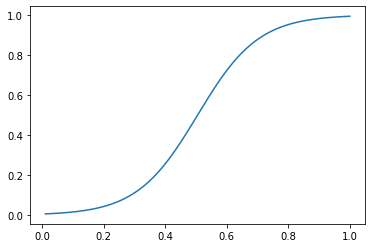

In [50]:
threshold_number = 200
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
plt.plot(np.linspace(0.01, 1, threshold_number), threshold_list)

In [51]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_bce, fn_number_list_FNN_bce, 
 delay_list_FNN_bce, fp_delay_list_FNN_bce) = get_pareto_metrics_for_threshold(model_FNN_bce, final_test_loader, 
                                                                               threshold_list, LSTM_flag=False)

In [52]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_custom, fn_number_list_FNN_custom, 
 delay_list_FNN_custom, fp_delay_list_FNN_custom) = get_pareto_metrics_for_threshold(model_FNN_custom, final_test_loader, 
                                                                                     threshold_list, LSTM_flag=False)

In [53]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_combined, fn_number_list_FNN_combined, 
 delay_list_FNN_combined, fp_delay_list_FNN_combined) = get_pareto_metrics_for_threshold(model_FNN_combined, final_test_loader, 
                                                                                         threshold_list, LSTM_flag=False)

In [54]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_LSTM_bce, fn_number_list_LSTM_bce, 
 delay_list_LSTM_bce, fp_delay_list_LSTM_bce) = get_pareto_metrics_for_threshold(model_LSTM_bce, final_test_loader, 
                                                                                 threshold_list, LSTM_flag=True)

In [55]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_LSTM_custom, fn_number_list_LSTM_custom, 
 delay_list_LSTM_custom, fp_delay_list_LSTM_custom) = get_pareto_metrics_for_threshold(model_LSTM_custom, final_test_loader, 
                                                                                       threshold_list, LSTM_flag=True)

In [56]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)
print(len(final_test_loader))
(fp_number_list_LSTM_combined, fn_number_list_LSTM_combined, delay_list_LSTM_combined, fp_delay_list_LSTM_combined) = get_pareto_metrics_for_threshold(model_LSTM_combined, final_test_loader, threshold_list, LSTM_flag=True)

4


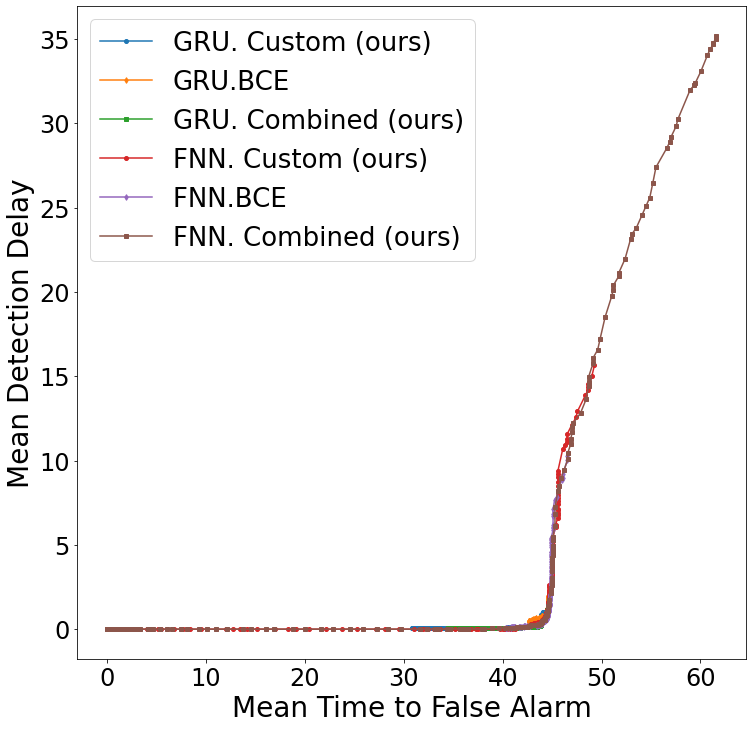

In [57]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_LSTM_custom, delay_list_LSTM_custom, '-o', markersize=4, label='GRU. Custom (ours)')
plt.plot(fp_delay_list_LSTM_bce, delay_list_LSTM_bce, '-d', markersize=4, label='GRU.BCE')
plt.plot(fp_delay_list_LSTM_combined, delay_list_LSTM_combined, '-s', markersize=4, label='GRU. Combined (ours)')
plt.plot(fp_delay_list_FNN_custom, delay_list_FNN_custom, '-o', markersize=4, label='FNN. Custom (ours)')
plt.plot(fp_delay_list_FNN_bce, delay_list_FNN_bce, '-d', markersize=4, label='FNN.BCE ')
plt.plot(fp_delay_list_FNN_combined, delay_list_FNN_combined, '-s', markersize=4, label='FNN. Combined (ours)')



plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);
plt.savefig('curve.pdf', bbox_inches='tight')

In [58]:
print('GRU. CustomLoss model'," area under the graph: ", np.trapz(delay_list_LSTM_custom, fp_delay_list_LSTM_custom))
print('GRU.BCELoss model'," area under the graph: ", np.trapz(delay_list_LSTM_bce, fp_delay_list_LSTM_bce))
print('GRU. Combined model'," area under the graph: ", np.trapz(delay_list_LSTM_combined, fp_delay_list_LSTM_combined))
print('FNN. CustomLoss model'," area under the graph: ", np.trapz(delay_list_FNN_custom, fp_delay_list_FNN_custom))
print('FNN.BCELoss model'," area under the graph: ", np.trapz(delay_list_FNN_bce, fp_delay_list_FNN_bce))
print('FNN. Combined model'," area under the graph: ", np.trapz(delay_list_FNN_combined, fp_delay_list_FNN_combined))

GRU. CustomLoss model  area under the graph:  1.5160590277777783
GRU.BCELoss model  area under the graph:  1.4404296875000044
GRU. Combined model  area under the graph:  1.6300998263888844
FNN. CustomLoss model  area under the graph:  52.48725043402777
FNN.BCELoss model  area under the graph:  14.918375651041668
FNN. Combined model  area under the graph:  375.64916992187483


In [59]:
def find_nearest_threshold(array, value):
    #print(value)
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return threshold_list[idx]

def cross_the_border(x_meaning, y_meaning, border):
  for x, y in zip(x_meaning, y_meaning):
    if x > border:
      return y

def model_crossing(model_name, model, fp_delay, delay, LSTM_flag):
  x_coord = [24, 28, 32, 36, 40, 44, 48]
  y_coord = []
  thresold_value = []

  model_results_list = []

  for i in range(len(x_coord)):

      test_batch_size = 64
      final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)
      
      print(fp_delay)
      print(delay)
      print(x_coord[i])
      y_coord.append(cross_the_border(fp_delay, delay, x_coord[i]))
      thresold_value.append(find_nearest_threshold(delay, y_coord[i]))

      true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean =  get_quality_metrics_for_results(model, final_test_loader, thresold_value[i], LSTM_flag)

      curr_model_res_points = [model_name, x_coord[i], y_coord[i], thresold_value[i]]
      curr_mode_res_threshold = [true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean]
      curr_model_res = curr_model_res_points + curr_mode_res_threshold

      model_results_list.append(curr_model_res)

  #print(model_name, "(Mean FP delay, Mean delay): ", str([x_coord[0], y_coord[0]])," " ,str([x_coord[1], y_coord[1]]), " ", str([x_coord[2], y_coord[2]]))
  for i in range(len(x_coord)):
    print(model_name, "(Mean FP delay, Mean delay, Threshold): ", str([x_coord[i], y_coord[i]]), str(thresold_value[i]))
  print("---"*10)

  return model_results_list

In [60]:
# model_crossing('LSTM. CustomLoss model', fp_delay_list_LSTM_custom, delay_list_LSTM_custom)
# model_crossing('LSTM.BCELoss model', fp_delay_list_LSTM_bce, delay_list_LSTM_bce)
# model_crossing('LSTM. Combined model', fp_delay_list_LSTM_combined, delay_list_LSTM_combined)
# model_crossing('FNN. CustomLoss model', fp_delay_list_FNN_custom, delay_list_FNN_custom)
# model_crossing('FNN.BCELoss model', fp_delay_list_FNN_bce, delay_list_FNN_bce)
# model_crossing('FNN. Combined model', fp_delay_list_FNN_combined, delay_list_FNN_combined)

**Сохранение результатов в ексель табличку**

In [68]:
import pandas as pd

In [ ]:
columns_list = ["Model name", "Mean FP delay", "Mean delay", "Threshold", "TP", "TN", "FP", "FN", "Acc",
                "Precision", "Recall", "F1-score", "G-mean"]

In [ ]:
data_model_FNN_bce = model_crossing("model_FNN_bce", model_FNN_bce, fp_delay_list_FNN_bce, delay_list_FNN_bce, LSTM_flag=False)
df_main = pd.DataFrame(data_model_FNN_bce, columns = columns_list)

data_model_FNN_custom = model_crossing("model_FNN_custom", model_FNN_custom, fp_delay_list_FNN_custom, delay_list_FNN_custom, LSTM_flag=False)
df_main = df_main.append(pd.DataFrame(data_model_FNN_custom, columns = columns_list), ignore_index=True)

data_model_FNN_combined = model_crossing("model_FNN_combined", model_FNN_combined, fp_delay_list_FNN_combined, delay_list_FNN_combined, LSTM_flag=False)
df_main = df_main.append(pd.DataFrame(data_model_FNN_combined, columns = columns_list), ignore_index=True)

data_model_LSTM_bce = model_crossing("model_GRU_bce", model_LSTM_bce, fp_delay_list_LSTM_bce, delay_list_LSTM_bce, LSTM_flag=True)
df_main = df_main.append(pd.DataFrame(data_model_LSTM_bce, columns = columns_list), ignore_index=True)

data_model_LSTM_custom = model_crossing("model_GRU_custom", model_LSTM_custom, fp_delay_list_LSTM_custom, delay_list_LSTM_custom, LSTM_flag=True)
df_main = df_main.append(pd.DataFrame(data_model_LSTM_custom, columns = columns_list), ignore_index=True)

data_model_LSTM_combined = model_crossing("model_GRU_combined", model_LSTM_combined,fp_delay_list_LSTM_combined, delay_list_LSTM_combined, LSTM_flag=True)
df_main = df_main.append(pd.DataFrame(data_model_LSTM_combined, columns = columns_list), ignore_index=True)


In [ ]:
df_main.to_excel("num" + seq_name + "_old.xlsx", index = False)

## New metrics KOSTUL

In [ ]:
def find_nearest_threshold(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return threshold_list[idx]

def cross_the_border(x_meaning, y_meaning, border):
  for x, y in zip(x_meaning, y_meaning):
    if x > border:
      return y

def model_crossing(model_name, model, fp_delay, delay, LSTM_flag):
  x_coord = [40, 44, 48, 52, 56, 60, 62]
  y_coord = []
  thresold_value = []

  model_results_list = []

  for i in range(len(x_coord)):

      test_batch_size = 64
      final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

      y_coord.append(cross_the_border(fp_delay, delay, x_coord[i]))
      thresold_value.append(find_nearest_threshold(delay, y_coord[i]))

      true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean =  get_quality_metrics_for_results(model, final_test_loader, thresold_value[i], LSTM_flag)

      curr_model_res_points = [model_name, x_coord[i], y_coord[i], thresold_value[i]]
      curr_mode_res_threshold = [true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean]
      curr_model_res = curr_model_res_points + curr_mode_res_threshold

      model_results_list.append(curr_model_res)

  #print(model_name, "(Mean FP delay, Mean delay): ", str([x_coord[0], y_coord[0]])," " ,str([x_coord[1], y_coord[1]]), " ", str([x_coord[2], y_coord[2]]))
  for i in range(len(x_coord)):
    print(model_name, "(Mean FP delay, Mean delay, Threshold): ", str([x_coord[i], y_coord[i]]), str(thresold_value[i]))
  print("---"*10)

  return model_results_list

In [ ]:
def get_quality_metrics(test_loader, model, threshold=0.5, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]

        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            
            # torch.rand_like
            curr_fp, curr_fn, curr_delay, curr_fp_delay, curr_accuracy = evaluate_metrics_new(curr_labels, curr_predictions, 
                                                                           threshold)

            max_difference = np.abs((curr_labels.max() - curr_labels.min()).item())
            if max_difference: 
                delay_list.append(curr_delay)
            positive_number += (max_difference > 0)
            negative_number += 1 - (max_difference > 0)

            fp_list.append(curr_fp)
            fn_list.append(curr_fn)
            fp_delay_list.append(curr_fp_delay)
            accuracy_list.append(curr_accuracy)

        test_acc_list.append(np.mean(accuracy_list[-test_batch_size:]))
        
    return (positive_number, negative_number, np.mean(test_loss_list), np.mean(test_acc_list), np.mean(delay_list),
            np.mean(fp_delay_list), np.sum(fp_list), np.sum(fn_list))

In [ ]:
def get_quality_metrics_for_results(model, test_loader, threshold, LSTM_flag=True):
    test_loss_list = []
    test_acc_list = []
    
    def weird_division(n, d):
      return n / d if d else 0

    positive_number = 0 
    negative_number = 0
    fp_list = []
    fn_list = []
    delay_list = []
    fp_delay_list = []
    accuracy_list = []

    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    model.eval()
    for test_inputs, test_true_labels in test_loader:
        if test_inputs.shape[0] < test_batch_size:
            break
            
        test_inputs, test_true_labels = test_inputs.to(device), test_true_labels.to(device)

        if LSTM_flag:
            test_hidden = model.init_hidden(batch_size)
            test_hidden = tuple([each.data for each in test_hidden])
            test_predictions, test_hidden = model(test_inputs, test_hidden)
        else:
            test_predictions = model(test_inputs)
            
        test_loss = loss_function(test_predictions.squeeze(), test_true_labels.float())
        test_loss_list += [test_loss.cpu().clone().detach()]
        
        for i in range(0, test_batch_size):
            curr_labels = test_true_labels[i]
            curr_predictions = test_predictions[i]
            true_positive_cur, true_negative_cur, false_positive_cur, false_negative_cur = evaluate_metrics_new(
                curr_labels, curr_predictions, threshold, is_for_results = True)
        
            true_positive += true_positive_cur
            true_negative += true_negative_cur
            false_positive += false_positive_cur
            false_negative += false_negative_cur


    accuracy = true_positive + true_negative / (true_positive + true_negative + false_positive + false_negative)
    precision = weird_division(true_positive , (true_positive + false_positive))
    print("Metrics", true_positive, true_negative, false_positive, false_negative, threshold)
    recall = weird_division(true_positive, (true_positive + false_negative))
    f1_score = 2 * weird_division((recall * precision), (recall + precision))
    spec = weird_division(true_negative, ( false_positive + true_negative ))
    g_mean = np.sqrt(recall + spec)

    return true_positive, true_negative, false_positive, false_negative, accuracy, precision, recall, f1_score, g_mean


In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_bce, fn_number_list_FNN_bce, 
 delay_list_FNN_bce, fp_delay_list_FNN_bce) = get_pareto_metrics_for_threshold(model_FNN_bce, final_test_loader, 
                                                                               threshold_list, LSTM_flag=False)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_custom, fn_number_list_FNN_custom, 
 delay_list_FNN_custom, fp_delay_list_FNN_custom) = get_pareto_metrics_for_threshold(model_FNN_custom, final_test_loader, 
                                                                                     threshold_list, LSTM_flag=False)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_FNN_combined, fn_number_list_FNN_combined, 
 delay_list_FNN_combined, fp_delay_list_FNN_combined) = get_pareto_metrics_for_threshold(model_FNN_combined, final_test_loader, 
                                                                                         threshold_list, LSTM_flag=False)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_LSTM_bce, fn_number_list_LSTM_bce, 
 delay_list_LSTM_bce, fp_delay_list_LSTM_bce) = get_pareto_metrics_for_threshold(model_LSTM_bce, final_test_loader, 
                                                                                 threshold_list, LSTM_flag=True)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)

(fp_number_list_LSTM_custom, fn_number_list_LSTM_custom, 
 delay_list_LSTM_custom, fp_delay_list_LSTM_custom) = get_pareto_metrics_for_threshold(model_LSTM_custom, final_test_loader, 
                                                                                       threshold_list, LSTM_flag=True)

In [ ]:
test_batch_size = 64
final_test_loader = prepare_loader(test_data, test_labels, seq_len, input_size, test_batch_size, shuffle=False)
print(len(final_test_loader))
(fp_number_list_LSTM_combined, fn_number_list_LSTM_combined, delay_list_LSTM_combined, fp_delay_list_LSTM_combined) = get_pareto_metrics_for_threshold(model_LSTM_combined, final_test_loader, threshold_list, LSTM_flag=True)

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list_LSTM_custom, delay_list_LSTM_custom, '-o', label='LSTM. CustomLoss model')
plt.plot(fp_delay_list_LSTM_bce, delay_list_LSTM_bce, '-d', label='LSTM.BCELoss model')
plt.plot(fp_delay_list_LSTM_combined, delay_list_LSTM_combined, '-s', label='LSTM. Combined model')
plt.plot(fp_delay_list_FNN_custom, delay_list_FNN_custom, '-o', label='FNN. CustomLoss model')
plt.plot(fp_delay_list_FNN_bce, delay_list_FNN_bce, '-d', label='FNN.BCELoss model')
plt.plot(fp_delay_list_FNN_combined, delay_list_FNN_combined, '-s', label='FNN. Combined model')



plt.xlabel('Mean FP delay')
plt.ylabel('Mean delay')
#plt.yscale('log')
plt.legend(loc='upper left', fontsize=14);

In [ ]:
print('LSTM. CustomLoss model'," area under the graph: ", np.trapz(delay_list_LSTM_custom, fp_delay_list_LSTM_custom))
print('LSTM.BCELoss model'," area under the graph: ", np.trapz(delay_list_LSTM_bce, fp_delay_list_LSTM_bce))
print('LSTM. Combined model'," area under the graph: ", np.trapz(delay_list_LSTM_combined, fp_delay_list_LSTM_combined))
print('FNN. CustomLoss model'," area under the graph: ", np.trapz(delay_list_FNN_custom, fp_delay_list_FNN_custom))
print('FNN.BCELoss model'," area under the graph: ", np.trapz(delay_list_FNN_bce, fp_delay_list_FNN_bce))
print('FNN. Combined model'," area under the graph: ", np.trapz(delay_list_FNN_combined, fp_delay_list_FNN_combined))

In [ ]:
data_model_FNN_bce = model_crossing("model_FNN_bce", model_FNN_bce, fp_delay_list_FNN_bce, delay_list_FNN_bce, LSTM_flag=False)
df_main_new = pd.DataFrame(data_model_FNN_bce, columns = columns_list)

data_model_FNN_custom = model_crossing("model_FNN_custom", model_FNN_custom, fp_delay_list_FNN_custom, delay_list_FNN_custom, LSTM_flag=False)
df_main_new = df_main_new.append(pd.DataFrame(data_model_FNN_custom, columns = columns_list), ignore_index=True)

data_model_FNN_combined = model_crossing("model_FNN_combined", model_FNN_combined, fp_delay_list_FNN_combined, delay_list_FNN_combined, LSTM_flag=False)
df_main_new = df_main_new.append(pd.DataFrame(data_model_FNN_combined, columns = columns_list), ignore_index=True)

data_model_LSTM_bce = model_crossing("model_LSTM_bce", model_LSTM_bce, fp_delay_list_LSTM_bce, delay_list_LSTM_bce, LSTM_flag=True)
df_main_new = df_main_new.append(pd.DataFrame(data_model_LSTM_bce, columns = columns_list), ignore_index=True)

data_model_LSTM_custom = model_crossing("model_LSTM_custom", model_LSTM_custom, fp_delay_list_LSTM_custom, delay_list_LSTM_custom, LSTM_flag=True)
df_main_new = df_main_new.append(pd.DataFrame(data_model_LSTM_custom, columns = columns_list), ignore_index=True)

data_model_LSTM_combined = model_crossing("model_LSTM_combined", model_LSTM_combined,fp_delay_list_LSTM_combined, delay_list_LSTM_combined, LSTM_flag=True)
df_main_new = df_main_new.append(pd.DataFrame(data_model_LSTM_combined, columns = columns_list), ignore_index=True)


In [ ]:
df_main_new.to_excel("num" + seq_name + "_new.xlsx", index = False)